In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

data_path = "../data/"

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')


In [2]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
all_data = pd.concat([test,train], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336.0
17375,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241.0
17376,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168.0
17377,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12.0,117.0,129.0


In [7]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday
train


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [8]:
import calendar

train['weekday'] = train['datetime'].apply(lambda date: calendar.day_name[date.weekday()])

In [9]:
train['season'] = train['season'].map({
    1:'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

train['weather'] = train['weather'].map({
    1: 'Clear',
    2: 'Mist, Few clouds',
    3: 'Light Snow, Rain, Thunderstom',
    4: 'Heavy Rain, Thunderstorm, Snow, Fog'
})

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

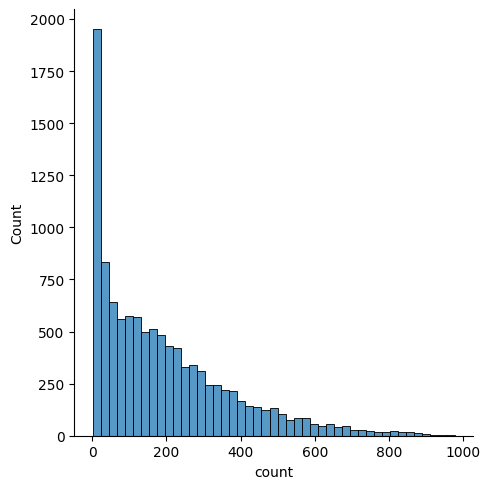

In [11]:
# mpl.rc('font',size = 15)
sns.displot(train['count'])

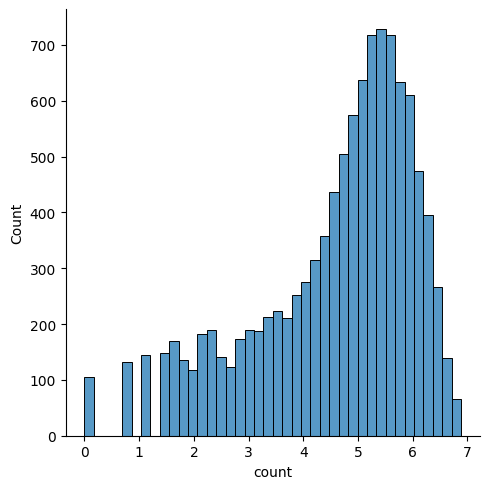

In [12]:
sns.displot(np.log(train['count']))

[Text(0.5, 1.0, 'Rental amount by second')]

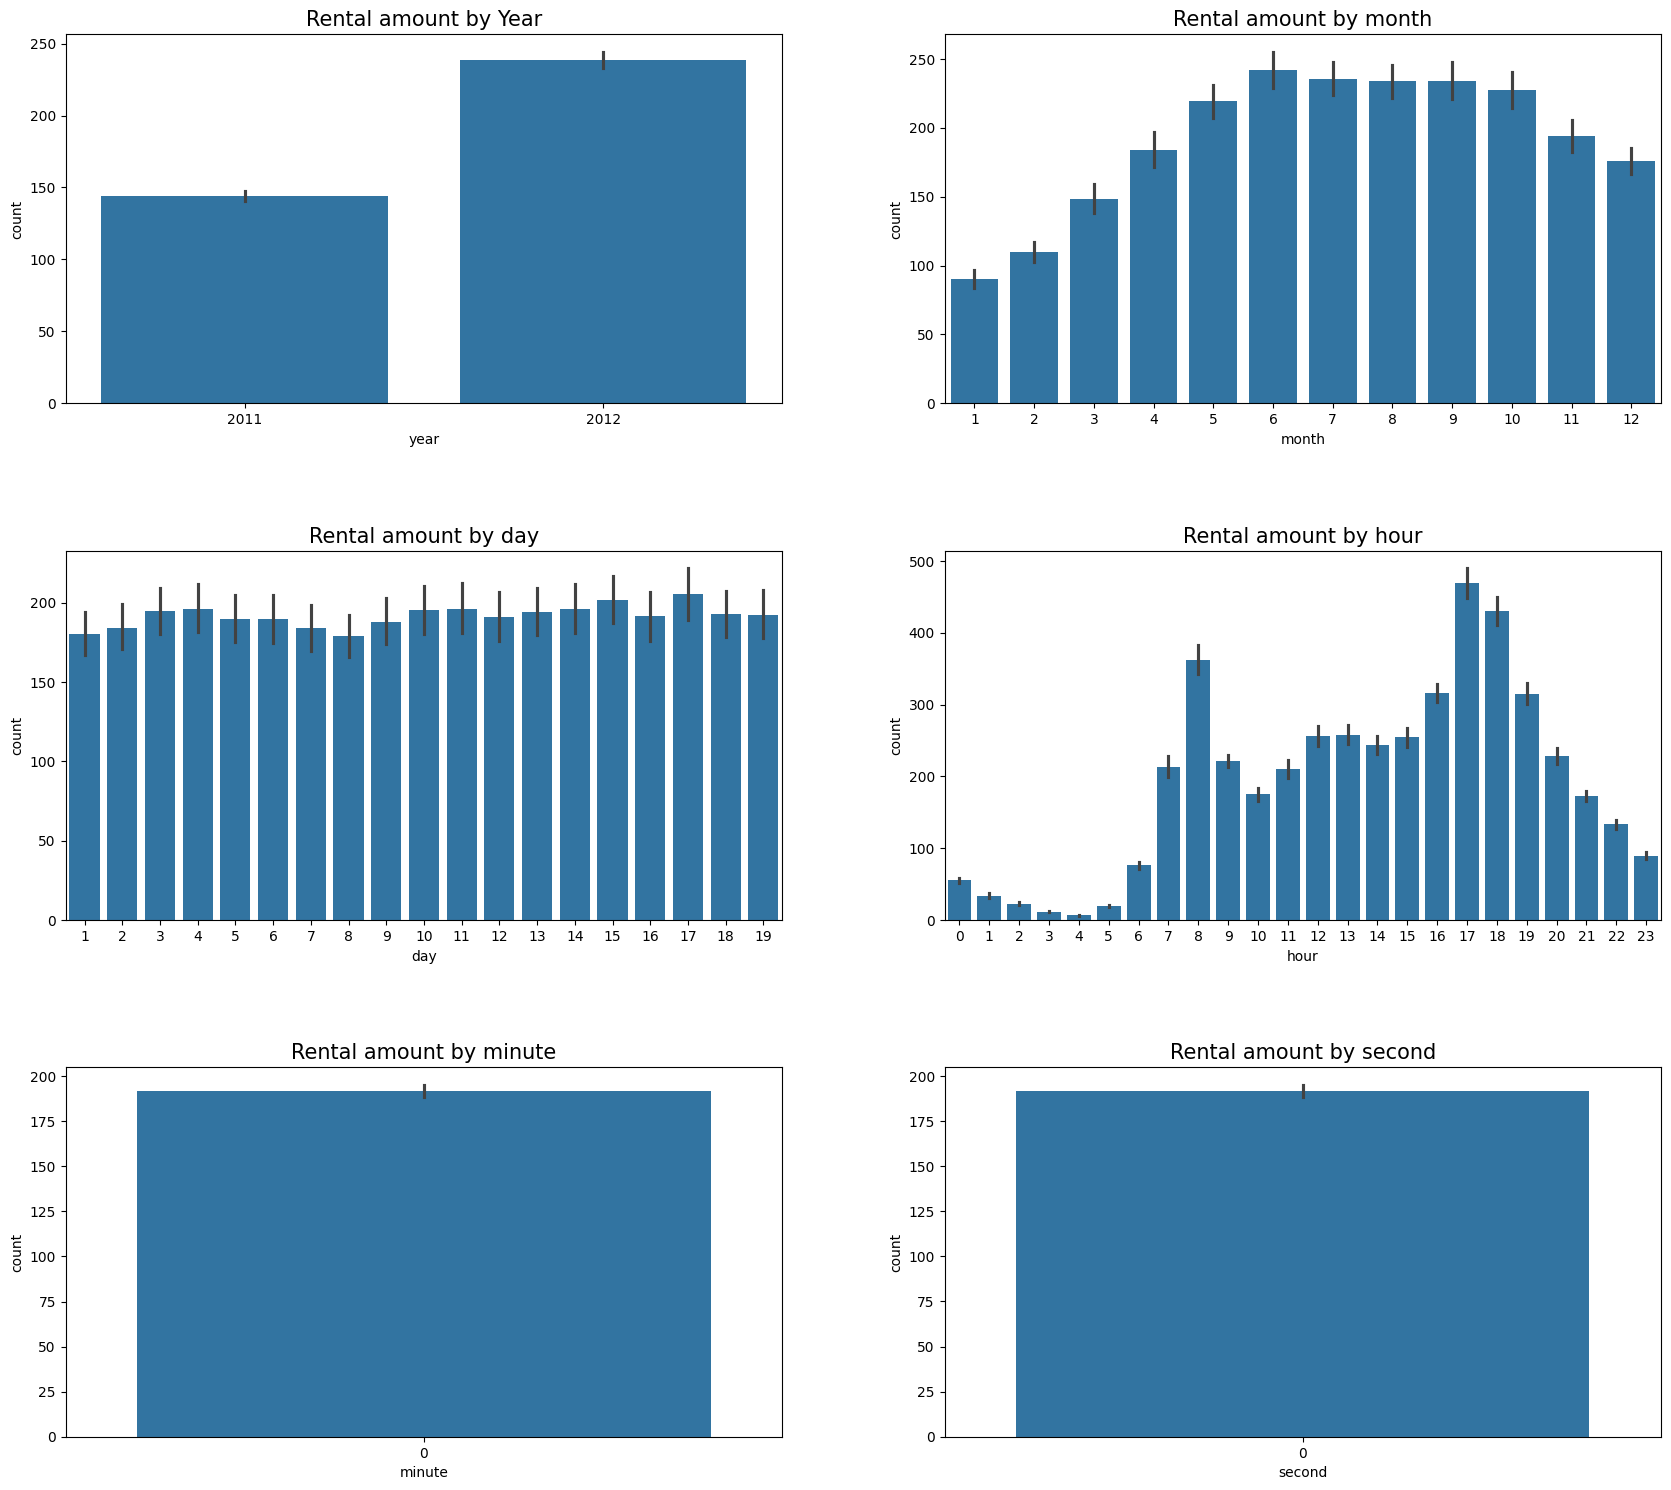

In [13]:
mpl.rc('font',size=10)
mpl.rc('axes',titlesize = 15)
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(18,16)

sns.barplot(x='year',y='count',data=train, ax=axes[0,0])
sns.barplot(x='month',y='count',data=train, ax=axes[0,1])
sns.barplot(x='day',y='count',data=train, ax=axes[1,0])
sns.barplot(x='hour',y='count',data=train, ax=axes[1,1])
sns.barplot(x='minute',y='count',data=train, ax=axes[2,0])
sns.barplot(x='second', y= 'count', data=train, ax=axes[2,1])

axes[0,0].set(title='Rental amount by Year')
axes[0,1].set(title='Rental amount by month')
axes[1,0].set(title='Rental amount by day')
axes[1,1].set(title='Rental amount by hour')
axes[2,0].set(title='Rental amount by minute')
axes[2,1].set(title='Rental amount by second')

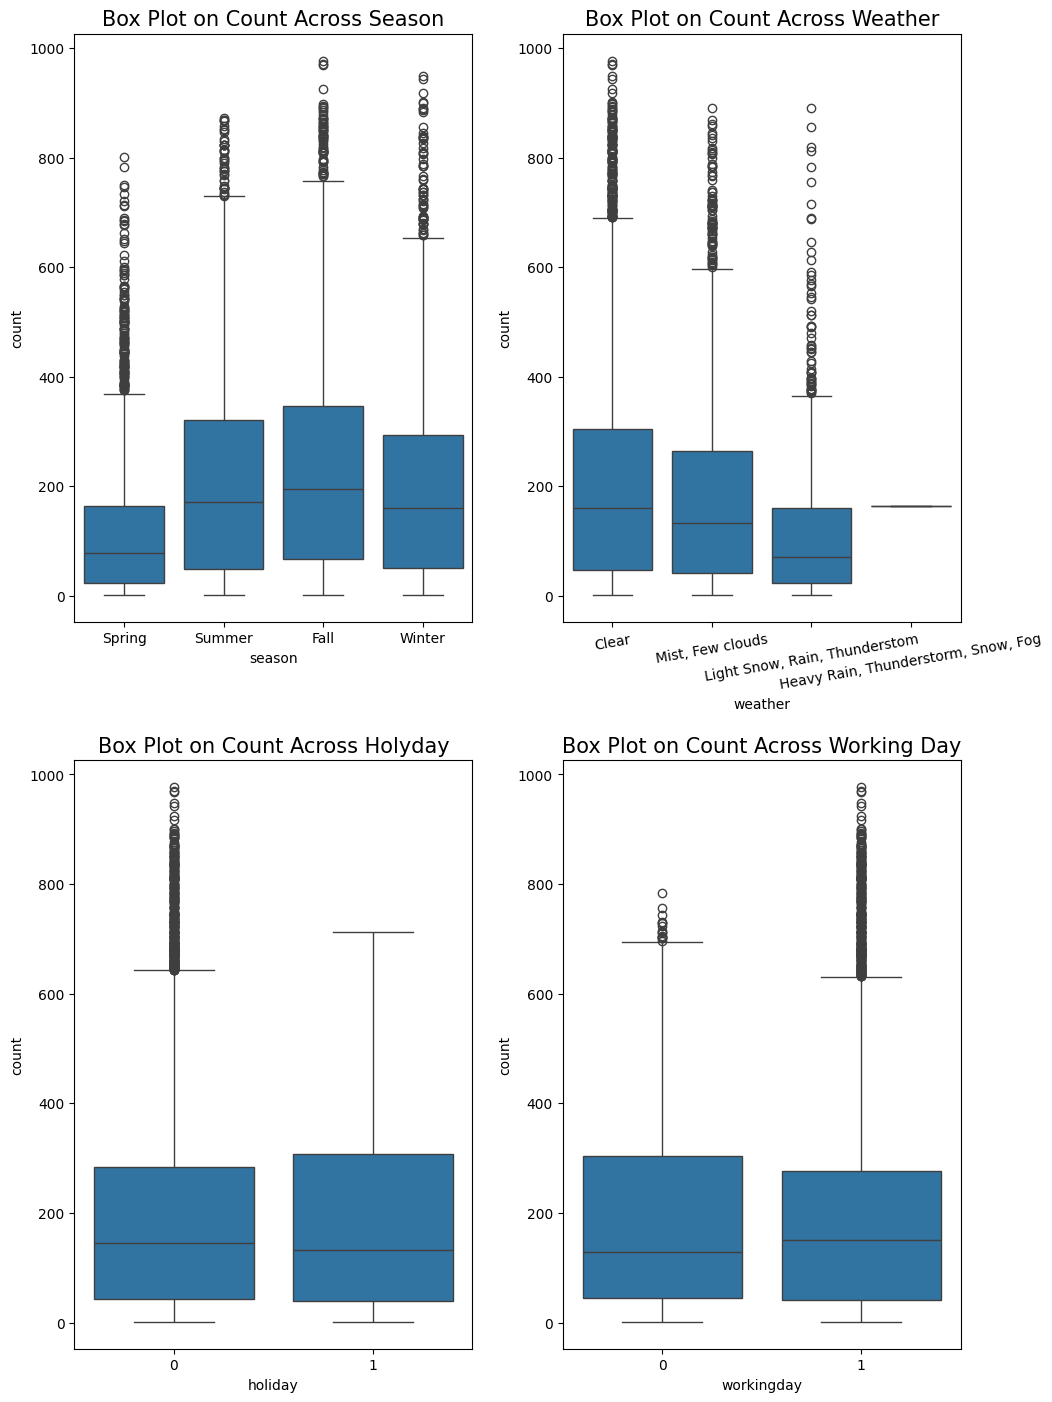

In [14]:
figure, axes = plt.subplots(nrows=2, ncols =2)
plt.tight_layout()
figure.set_size_inches(10,15)

sns.boxplot(x='season',y='count', data= train, ax= axes[0,0])
sns.boxplot(x='weather', y= 'count', data = train, ax=axes[0,1])
sns.boxplot(x='holiday', y= 'count', data=train, ax= axes[1,0])
sns.boxplot(x='workingday', y='count', data= train, ax = axes[1,1])

axes[0,0].set(title='Box Plot on Count Across Season')
axes[0,1].set(title='Box Plot on Count Across Weather')
axes[1,0].set(title='Box Plot on Count Across Holyday')
axes[1,1].set(title='Box Plot on Count Across Working Day')

axes[0,1].tick_params(axis='x',labelrotation=10)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\160159221.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='hour', y='count', data= train, hue = 'workingday', ax= axes[0], scale=0.5)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\160159221.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='hour', y='count', data= train, hue= 'holiday', ax=axes[1], scale=0.5)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32528\160159221.py:7: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` 

<Axes: xlabel='hour', ylabel='count'>

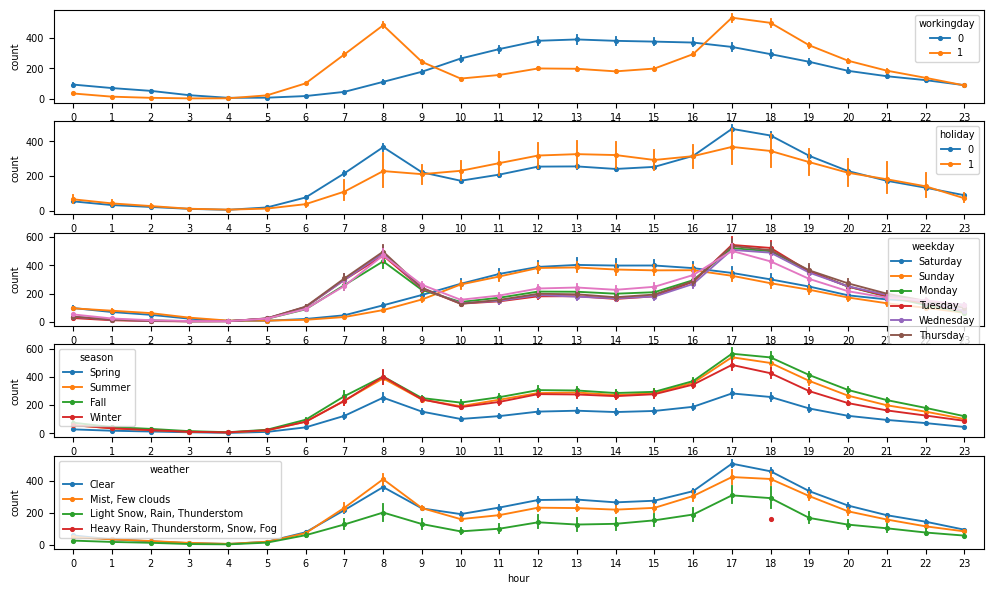

In [15]:
mpl.rc('font',size=7)
figure,axes=plt.subplots(nrows = 5)
figure.set_size_inches(12,7)

sns.pointplot(x='hour', y='count', data= train, hue = 'workingday', ax= axes[0], scale=0.5)
sns.pointplot(x='hour', y='count', data= train, hue= 'holiday', ax=axes[1], scale=0.5)
sns.pointplot(x='hour', y='count', data= train, hue= 'weekday', ax=axes[2], scale=0.5)
sns.pointplot(x='hour', y='count', data= train, hue= 'season', ax=axes[3], scale=0.5)
sns.pointplot(x='hour', y='count', data= train, hue= 'weather', ax=axes[4], scale=0.5)

<Axes: xlabel='humidity', ylabel='count'>

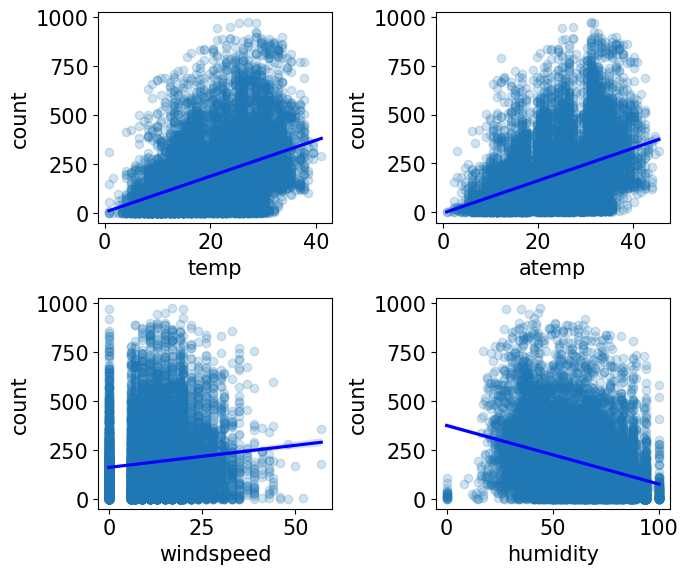

In [16]:
mpl.rc('font', size= 15)
figure, axes = plt.subplots(nrows =2, ncols= 2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x= 'temp', y='count', data= train, ax = axes[0,0], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x= 'atemp', y='count', data= train, ax = axes[0,1], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x= 'windspeed', y='count', data= train, ax = axes[1,0], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x= 'humidity', y='count', data= train, ax = axes[1,1], scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})


In [17]:
train[['temp','atemp','humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

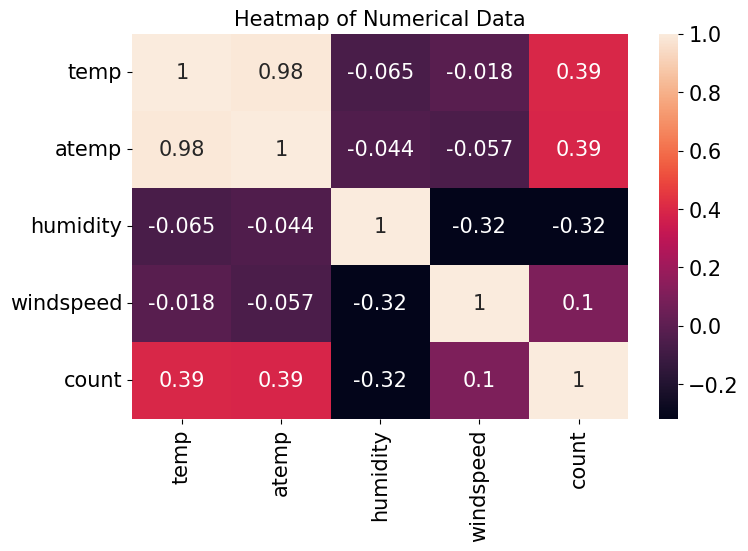

In [18]:
corrMat = train[['temp','atemp','humidity', 'windspeed', 'count']].corr()
fig, ax= plt.subplots()
fig.set_size_inches(8,5)
sns.heatmap(corrMat, annot=True)
ax.set(title = 'Heatmap of Numerical Data')